In [1]:
import os
import cv2
import tensorflow as tf
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import re
import easyocr
from tensorflow.keras.models import load_model
from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
from pyzbar.pyzbar import decode

2022-05-12 15:28:03.094335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yasmine/jupyter/environment/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-12 15:28:03.094455: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = load_model('VGG16_DocClassifierv3.model')

2022-05-12 15:30:21.232976: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-12 15:30:21.233064: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yasmine-Lenovo-ideapad-130-15IKB): /proc/driver/nvidia/version does not exist
2022-05-12 15:30:21.270726: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-12 15:30:21.919616: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 50176000 exceeds 10% of free system memory.
2022-05-12 15:30:22.029684: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 50176000 exceeds 10% of free system m

In [12]:
model.save("VGG16_DocClassifierv3.h5")

In [3]:
def image_preprocessing(path):
    img=cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]
    #plt.imshow(img)
    #cv2.imwrite(r"th.png",img)
    return img

In [4]:
def BarcodeReader(img):
    
    # Decode the barcode image
    detectedBarcodes = decode(img)
    
    # If not detected then print the message
    if not detectedBarcodes:
        print("Barcode Not Detected or your barcode is blank/corrupted!")
    else:
    
        # Traverse through all the detected barcodes in image
        for barcode in detectedBarcodes:
        
            # Locate the barcode position in image
            (x, y, w, h) = barcode.rect
            
            # Put the rectangle in image using
            # cv2 to heighlight the barcode
            cv2.rectangle(img, (x-10, y-10),
                        (x + w+10, y + h+10),
                        (255, 0, 0), 2)
            
            if barcode.data!="":
            
            # Print the barcode data
                print(barcode.data)
                print(barcode.type)
                
            
    return barcode.data.decode("utf-8")

In [5]:
path="/home/yasmine/Téléchargements/2 29/"
data=[]
name=[]
for filename in os.listdir(path):
    #print(filename)
    images = convert_from_path(path+filename)
    images[0].save('img.jpg', 'JPEG')
    image = cv2.imread('img.jpg')
    image = cv2.resize(image, (224,224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    name.append(filename)
    data.append(image)

In [6]:
data= np.array(data)
print(data.shape)

(161, 224, 224, 3)


In [7]:
predicted_labels = model.predict(data)

In [8]:
print(predicted_labels.shape)

(161, 5)


In [10]:
print(predicted_labels[0])

[4.83791140e-08 1.59261745e-05 6.06091553e-03 1.08976535e-01
 8.84946585e-01]


In [11]:
print((np.max(predicted_labels[0]).any()))

True


In [9]:
def typage(path):
    path1="/home/yasmine/Téléchargements/2 29/"
    for i in range(len(predicted_labels)) :
        if max(predicted_labels[i])>=0.995:
            if max(predicted_labels[i])==predicted_labels[i][0]:
                if not os.path.exists(path+"01/"):
                    os.makedirs(path+"01/")
                    #print("document de classe 0")
                    images = convert_from_path(path1+name[i])
                    #print(path+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"01/"+name[i].lower().replace("pdf", "jpg", 1),image)
                else:
                    images = convert_from_path(path1+name[i])
                    #print(path+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"01/"+name[i].lower().replace("pdf", "jpg", 1),image)
                
            
            
            elif max(predicted_labels[i])==predicted_labels[i][1]:
                if not os.path.exists(path+"02/"):
                    os.makedirs(path+"02/")
                    #print("document de classe 1")
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"02/"+name[i].lower().replace("pdf", "jpg", 1),image)
                else:
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"02/"+name[i].lower().replace("pdf", "jpg", 1),image)
                
            elif max(predicted_labels[i])==predicted_labels[i][2]:
                if not os.path.exists(path+"03/"):
                    os.makedirs(path+"03/")
                    #print("document de classe 2")
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"03/"+name[i].lower().replace("pdf", "jpg", 1),image)
                else:
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"03/"+name[i].lower().replace("pdf", "jpg", 1),image)
                    
            elif max(predicted_labels[i])==predicted_labels[i][4]:
                if not os.path.exists(path+"09/"):
                    os.makedirs(path+"09/")
                    #print("document de classe 2")
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"09/"+name[i].lower().replace("pdf", "jpg", 1),image)
                else:
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"09/"+name[i].lower().replace("pdf", "jpg", 1),image)       
            
            else:
                if not os.path.exists(path+"11/"):
                    os.makedirs(path+"11/")
                    #print("document de classe 3")
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"11/"+name[i].lower().replace("pdf", "jpg", 1),image)
                else:
                    images = convert_from_path(path1+name[i])
                    images[0].save('img.jpg', 'JPEG')
                    image = cv2.imread('img.jpg')
                    cv2.imwrite(path+"11/"+name[i].lower().replace("pdf", "jpg", 1),image)
        else:
        
            
            images = convert_from_path(path1+name[i])
            images[0].save('img.jpg', 'JPEG')
            image = cv2.imread('img.jpg')
            cv2.imwrite(path+name[i].lower().replace("pdf", "jpg", 1),image)
    

b'06072020029'
CODE128


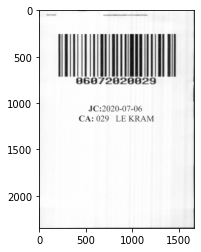

In [17]:
path="/home/yasmine/Téléchargements/2 29/"
j=0
image = convert_from_path(path+"20200716-00100001.pdf")
#plt.imshow(image)
image[0].save('img.jpg', 'JPEG')
plt.imshow(image[0])
image=image_preprocessing('img.jpg')

result=BarcodeReader(image)
jour=result[:2]
mois=result[2:4]
annee=result[4:8]
ca=result[8:]
if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/"):
    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/")
    if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/"):
        os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/")
        if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/"):
            os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/"+mois+"/")
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
        else:
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):        
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    
    else:
        if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/"):
            os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/")
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
        else:
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
        
                
else:
    
    if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/"):
        os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/")
        if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/"):
            os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/"+mois+"/")
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
        else:
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):   
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    
    else:
        if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/"):
            os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/")
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
        else:
            if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"):
                os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/")
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
            else:
                if not os.path.exists("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/"):
                    os.makedirs("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
                else:
                    typage("/home/yasmine/Téléchargements/banque/"+annee+"/Mois_"+mois+"/Agence_"+ca+"/"+jour+mois+annee+"_"+ca+"/")
        
    
       